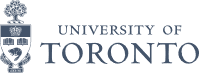

# Session 3: Neural Networks

# 1. Set Up the Environment



In [1]:
# MMF IT COURSE
# Session 3
# Funtions: Neural Networks and ML
# Student name: Xinyi (Cynthia) Shen
import scipy as sp
import numpy as np
import pylab as plt
import os as os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#@title <font color='blue' size='+2'> **Load files:** It is possible to load the files straight from your local folders
# Please do so importing all files required in the lab
from google.colab import files
uploaded = files.upload()

---

# 2. Laboratory session

## 2.1.	A short introduction to NN model

Although many toolboxes for neural network can be found on the Internet, for this lab, we will use the neural toolbox called sklearn (sciki-learn). Please go to the following web-site for detailed information. You will be able to find examples and additional resources for your own convenience.

http://scikit-learn.org

In this implementation we will implement a multi-layer perceptron (**MLP**). A multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(·): R^m -> R^o$  by training on a dataset, where  $m$ is the number of dimensions for input and   is the number of dimensions for output. Given a set of features $X=x_1, x_2, x_3 .. x_m$  and a target $y$ , **it can learn a non-linear function approximator for either classification or regression**. It is different from logistic regression, in that between the input and the output layer; there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

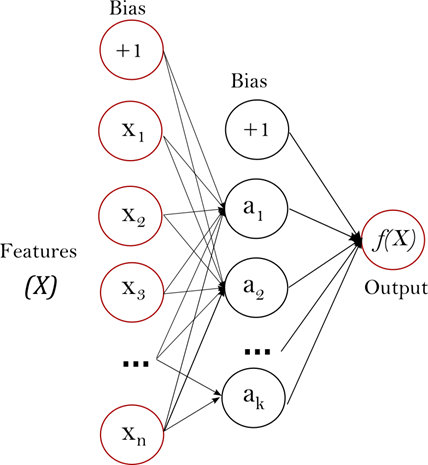

The **leftmost** layer, known as the **input layer**, consists of a set of neurons {${x_i|x_1,x_2,x_3... x_m}$}  representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a **weighted linear summation** $w_1x_1+w_2x_2+...+w_mx_m$ , **followed** by a **non-linear activation function** $g(·): R -> R $ - like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

The module contains the public attributes `coefs_` and `intercepts_`. **`coefs_`** is a list of **weight matrices**, where weight matrix at index $i$  represents the weights between layer $i$ and layer $i+1$. **`intercepts_ `** is a list of bias vectors, where the vector at index $i$ represents the bias values added to layer $i+1$.
The **advantages** of Multi-layer Perceptron are:
 - Capability to **learn non-linear models**.
 - Capability to **learn models in real-time** (on-line learning) using `partial_fit`.

The **disadvantages** of Multi-layer Perceptron (MLP) include:
 - MLP with hidden layers have a non-convex loss function where there exists **more than one local minimum**. Therefore, different random weight initializations **can lead to different validation accuracy**.
 - MLP requires **tuning a number of hyperparameters** such as the number of hidden neurons, layers, and iterations.
 - MLP is **sensitive** to feature **scaling**.


## 2.2.	Activation functions

**Many activation functions could be incorporated** in the NN decision process, and the results would be different depending in the function that is being used. **Experience** in this field, although it will vary depending on the data base, that **not linear activation functions provides a better performance** for real-life applications. The following script shows the fundamental activations functions available in this toolbox. We will strongly recommend using `tanh` or `logistic` functions for your work.




```
    import numpy as np
    from matplotlib import pyplot as plt
    x = np.arange(-10,11)
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    f1 = x
    plt.plot(x,f1)
    plt.title('identity')
    
    plt.subplot(2,2,2)
    f2 = 1./(1+np.exp(-x))
    plt.plot(x,f2)
    plt.title('logistic')
    
    plt.subplot(2,2,3)
    f3 = np.tanh(x)
    plt.plot(x,f3)
    plt.title('tahn')
    
    plt.subplot(2,2,4)
    f4 = np.zeros(np.shape(x))
    f4[np.argwhere(x>0)] = x[np.argwhere(x>0)]
    plt.plot(x,f4)
    plt.title('relu')

```



Text(0.5, 1.0, 'relu')

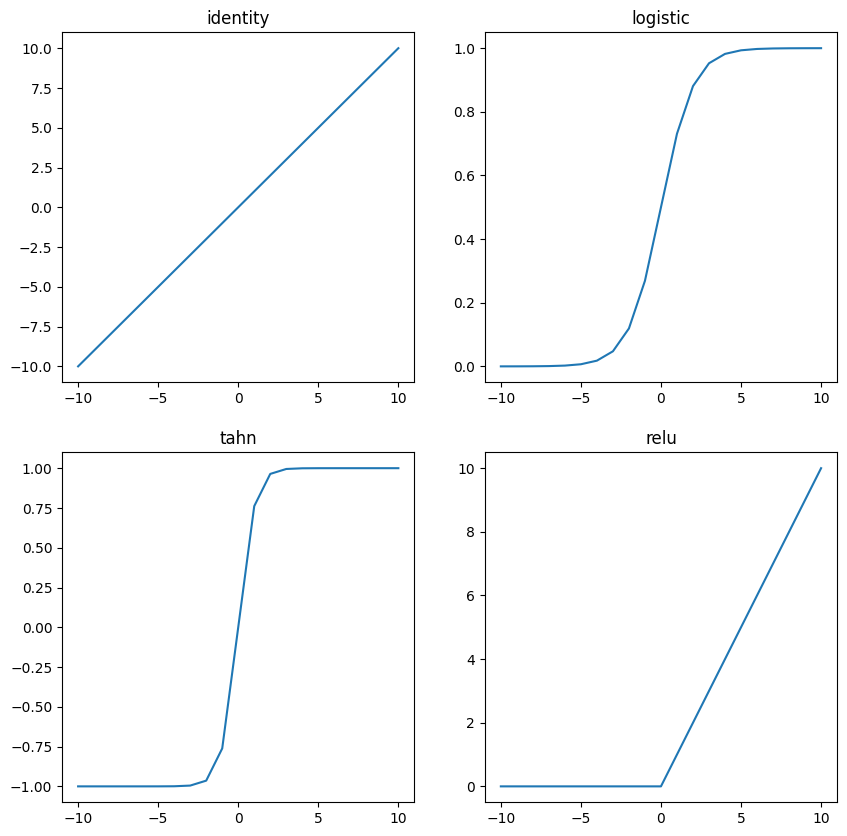

In [3]:
from matplotlib import pyplot as plt
x = np.arange(-10,11)

plt.figure(figsize=(10,10))

plt.subplot(221)
f1 = x
plt.plot(x, f1)
plt.title('identity')

plt.subplot(222)
f2 = 1./(1 + np.exp(-x))
plt.plot(x, f2)
plt.title('logistic')

plt.subplot(223)
f3 = np.tanh(x)
plt.plot(x, f3)
plt.title('tahn')

plt.subplot(224)
f4 = np.zeros(np.shape(x))
f4[np.argwhere(x>0)] = x[np.argwhere(x>0)]
plt.plot(x, f4)
plt.title('relu')


## 2.3.	Regularization and overfitting

As we all know NN are complex structures for simple models that depending on the number of elements could approximate almost any sample data. But it is also know as well that databases might have “**noise-data**”, or samples that are not really following the general pattern and should be considered as **“outlier”**. We should be **careful to incorporate them** into our model, because will make it **difficult to generalize properly**. This phenomenon of adjusting a model to an outlier is called **overfitting**.

In order to set properly the model to prevent this situation from happening we should incorporate a few **precautions**. First would be that the **number of neurons**, whatever the model is selected should be **a number of orders of magnitude lower** than the sample base. But normally this is not enough to prevent a bad fitting of the underlying model, especially if outliers are present. This is the reason why we incorporate a **margin of security** to the model definition. To evaluate different accepted margins of error for the samples, a **coefficient “alpha”** is defined in the model as it could be shown in NN theory documentation.

The following sample code shows some examples of different sample bases, models and alphas that illustrate these situations. Please run the code and follow it carefully for better understanding of the model.


This code will provide the following illustration.


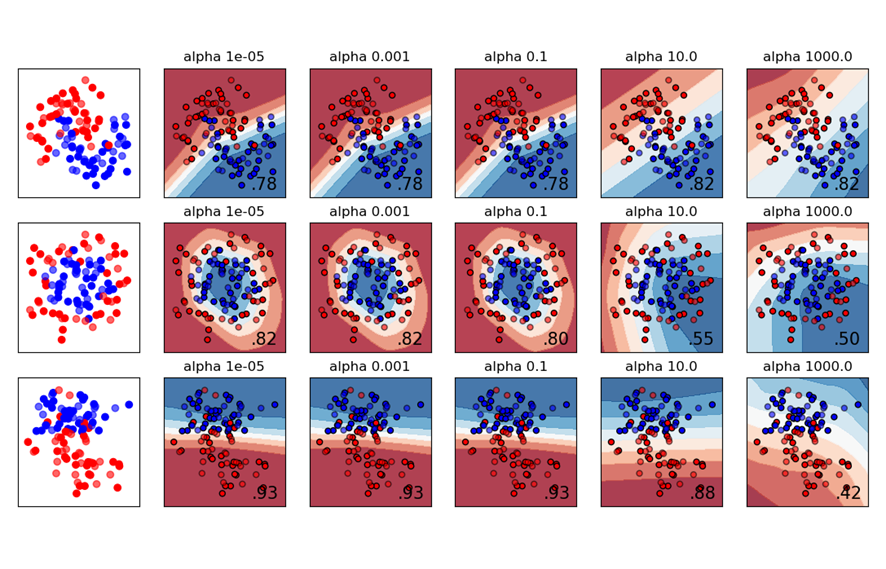

```
pip install scikit-learn
```

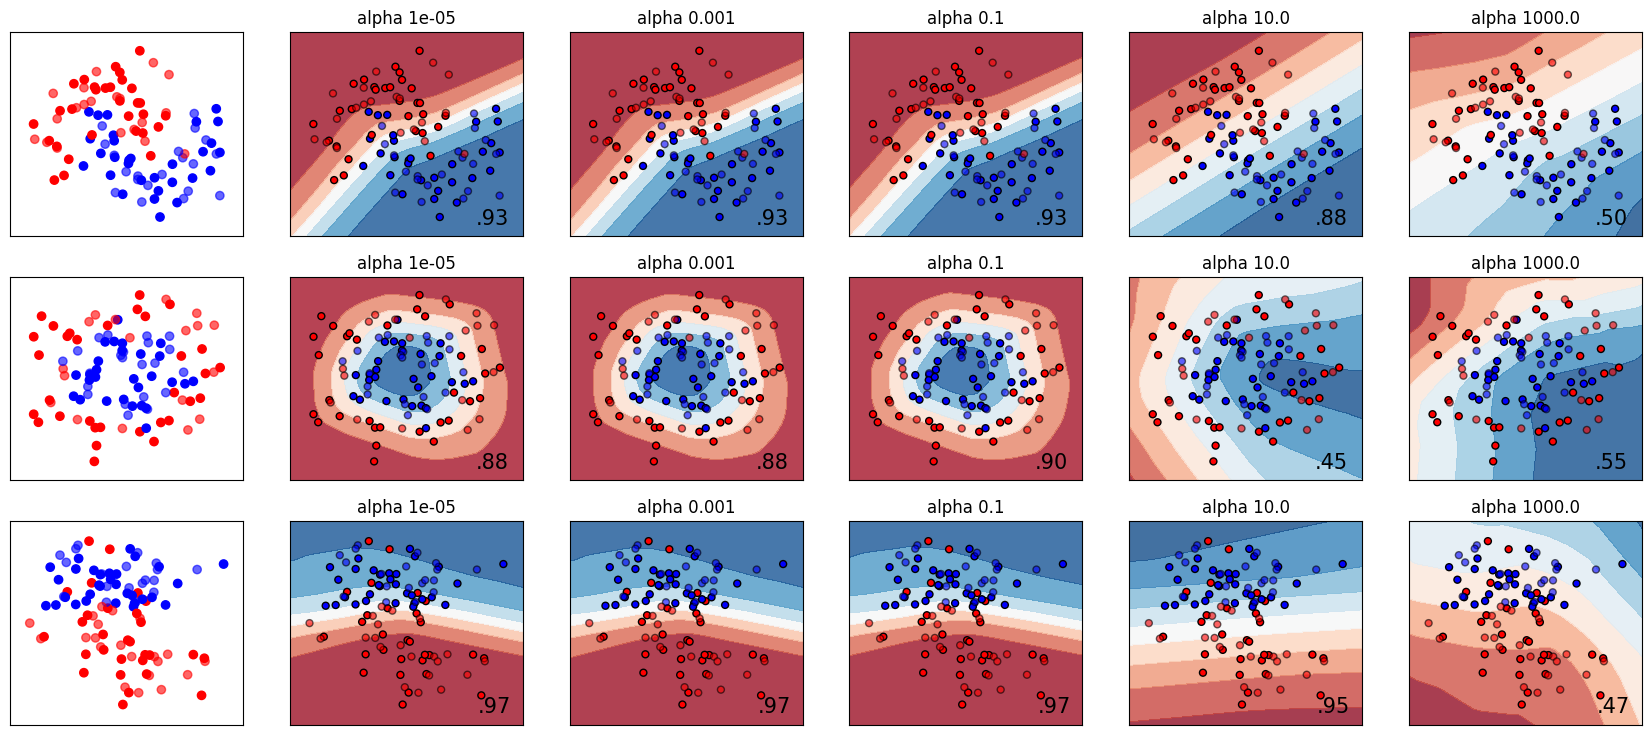

In [4]:
#@title **Regularization and overfitting**
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train);
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]);
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1];

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## 2.4.	Algorithms


MLP trains using **Stochastic Gradient Descent**, **Adam**, or **L-BFGS**. Stochastic Gradient Descent (**SGD**) **updates** parameters using the **gradient of the loss function with respect to a parameter that needs adaptation**, i.e.

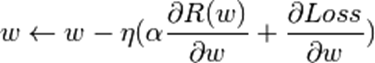

Where, 𝛈 is the learning rate, which **controls the step-size** in the parameter space search. $Loss$  is the loss function used for the network.

More details can be found in the documentation of [SGD](http://scikit-learn.org/stable/modules/sgd.html).

**Adam** is similar to SGD in a sense that it is a stochastic optimizer, but it can a**utomatically adjust the amount to update parameters** based on adaptive estimates of lower-order moments.

With SGD or Adam, training supports online and mini-batch learning.
**L-BFGS** is a solver that approximates the Hessian matrix which represents **the second-order partial derivative** of a function. Further it approximates the inverse of the Hessian matrix to perform parameter updates. The implementation uses the Scipy version of [L-BFGS](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html).

If the selected solver is ‘L-BFGS’, training does neither support online nor mini-batch learning.

---

# 3. NN examples

## 3.1.	Learning the XOR function

To start understanding better how neural networks work, we will start with a simple activity **implementing an XOR function**.

XOR: the output is `True` if the inputs are *different*; the output is `False` if the inputs are the *same*.

A | B || A xor B

---|--- || ---

1 | 1 || 0

1 | 0 || 1

0 | 1 || 1

0 | 0 || 0

To do so, we need a neural network with **two input neurons** and **one output**. Not a linearly separable problem, therefore we need a hidden layer that will place two neurons. It is important at this stage to say that we would use a script to develop this step and so, we can repeat all the steps just changing little information.


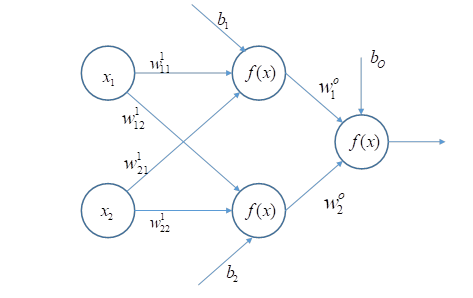

To create the network will use the function **MLPClassifier**, to create the network and **the function `fit` to train the network**. Here is an example of how to create a neural network input output with 2 neurons in the hidden layer. And we defined the training values as the imputs and the training labels as the desired output to train the model. For this case we will propose the use of the following parameters to speed-up the learning process and minimize the number of neurons.  
-	Algorithm: L-BFGS
-	Activation function: tanh
-	Number of hidden layers: 1
-	Number of neuron on the hidden layer: 2
-	Random state=1.

It is relevant at this stage that to inform that we will **set the random state to 1 every time the process is run**, and so, the model will not improve the performance if we run several times. The following code will create the training samples, and create the neural network and will train.

```
#@title Importing Sklearn Models
%reset
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
```



```
#@title Building & Training the MLP for XOR Function
#%% 2-Learning the XOR function

# Train Values
X = np.transpose(np.array([[1,1,0,0],[1,0,1,0]]))
print('X =', X)

#Train Labels
Y = np.array([0,1,1,0])
print('Y =', Y)

# Creation of a NN with 2 in hidden layer
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=2,random_state= 1);

# Training the net
net.fit(X,Y)
```



In [5]:
# @title Building & Training the MLP for XOR Function
# Learning the XOR function

# Train Values
X = np.transpose(np.array([[1,1,0,0],[1,0,1,0]]))
print('X =', X)

# Train Labels
Y = np.array([0,1,1,0])
print('Y =', Y)

# Creation of a NN with 2 in hidden layer
net = MLPClassifier(solver = 'lbfgs',
                    activation ='tanh',
                    hidden_layer_sizes=2,
                    random_state= 1);

# Training the net
net.fit(X,Y)

X = [[1 1]
 [1 0]
 [0 1]
 [0 0]]
Y = [0 1 1 0]


MLPClassifier(activation='tanh', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

The reader should be aware that this code performs the full processing, and although it would be an extremely intensive effort to evaluate all steps of the back-propagation method, once it is finalized a certain analysis could be performed. This analysis will help us to understand what happened and what we get. This is especially relevant when the learning process is not successful. So, we will illustrate the elements weights and execution of the samples one this process is performed.

In order **to get access to the weight matrix, you should use the “`net.coefs_`”** command. This command will offer you all weights of the NN, including the hidden layers neurons and the output layers neurons. Please use the following code that illustrate the way to access this information.




```
#@title Coeficients inside the network
WeightsMatrix = net.coefs_
HiddenLayerWeightsMatrix = WeightsMatrix[0]

print('Hidden Layer Weights Matrix:')
print(HiddenLayerWeightsMatrix)

OutputLayerWeightsMatrix = (WeightsMatrix[1])

print('Output Layer Weights Matrix:')

print(OutputLayerWeightsMatrix)
```



In [6]:
# @title Coeficients inside the network
WeightsMatrix = net.coefs_
HiddenLayerWeightsMatrix = WeightsMatrix[0]

print('Hidden Layer Weights Matrix:')
print(HiddenLayerWeightsMatrix)

OutputLayerWeightsMatrix = (WeightsMatrix[1])

print('Output Layer Weights Matrix:')

print(OutputLayerWeightsMatrix)

Hidden Layer Weights Matrix:
[[-3.53605826 -3.84309959]
 [-3.59407104 -3.68176683]]
Output Layer Weights Matrix:
[[-8.14917352]
 [ 8.3986378 ]]


And, if everything went properly, we will get the following values

```
Hidden Layer Weights Matrix =
[[-3.53605826 -3.84309959]
 [-3.59407104 -3.68176683]]

Output Layer Weights Matrix:
[[-8.14917352]
 [ 8.3986378 ]]

```




By the very same token, we can access **the bias of all neurons using the command “net.intercepts_”**. Run the following code to illustrate it.



```
BiasMatrix = net.intercepts_
BiasHiddenLayer = (np.array(BiasMatrix[0]))
print('Bias Hidden Layer:')
print(BiasHiddenLayer)
BiasOutputLayer = np.array(BiasMatrix[1])
print('Bias Output Layer:')
print(BiasOutputLayer)
```



In [7]:
BiasMatrix = net.intercepts_
BiasHiddenLayer = (np.array(BiasMatrix[0]))
print('Bias Hidden Layer:')
print(BiasHiddenLayer)
BiasOutputLayer = np.array(BiasMatrix[1])
print('Bias Output Layer:')
print(BiasOutputLayer)

Bias Hidden Layer:
[1.67584277 5.92534241]
Bias Output Layer:
[-8.34294754]


And again the output should be:
```
Bias Hidden Layer:
[[ 1.67584277  5.92534241]]
Bias Output Layer:
[[-8.34294755]]
```

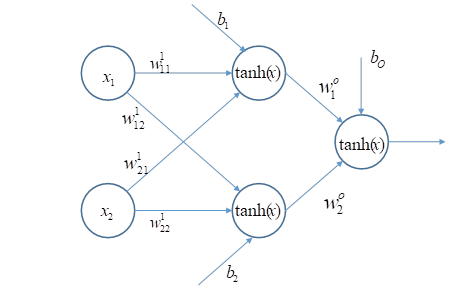

At this moment we should be able to calculate the flow of the process for each of the

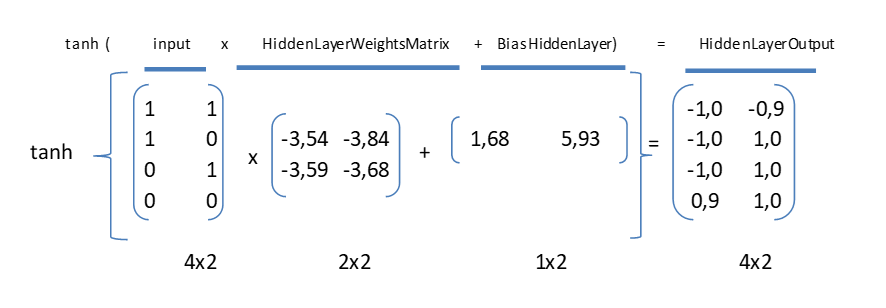

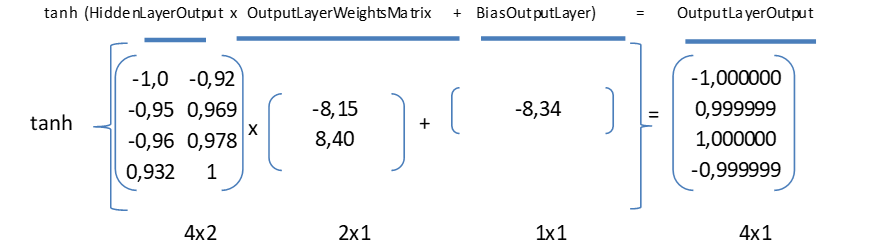

**Note for the reader**: *The reader could be at this point a bit confused because we added one single number in de second case, and two values arrays to a larger matrix. This operation, that in many mathematical tools produce an inconsistency format error, it is not in this case. Reader should bear in mind that when in python we add an “nxm” matrix to another “1xm” matrix, python will perform the operation for all rows of the initial matrix.*

To get the output we can execute the following commands



```
HiddenLayerOutput = np.tanh(np.dot(X,HiddenLayerWeightsMatrix)+BiasHiddenLayer)
print(np.round(HiddenLayerOutput,1))
```



In [8]:
HiddenLayerOutput = np.tanh(np.dot(X,HiddenLayerWeightsMatrix) + BiasHiddenLayer)
print(np.round(HiddenLayerOutput, 1))

[[-1.  -0.9]
 [-1.   1. ]
 [-1.   1. ]
 [ 0.9  1. ]]




```
OutputLayerOutput = np.tanh(np.dot(HiddenLayerOutput,OutputLayerWeightsMatrix)+BiasOutputLayer)
print(np.round(OutputLayerOutput,6))
```



In [9]:
OutputLayerOutput = np.tanh(np.dot(HiddenLayerOutput,OutputLayerWeightsMatrix) + BiasOutputLayer)
print(np.round(OutputLayerOutput, 6))

[[-1.      ]
 [ 0.999999]
 [ 1.      ]
 [-0.999999]]


The output of this function is also recognized as the **soft-output of NN, as it has infinite number of possible output values**. If we want to use this MLP for classification, **we should consider that these values should be converted to binary output {0,1}**. It is noticeable here that the range of the output of tanh(x) is [-1,1], and so values are entitled in that range. So the conversion to hard output could be performed as follows:



```
print('Soft = ', str(OutputLayerOutput))
print('Hard = ', str(np.floor(OutputLayerOutput)+1))
```



In [10]:
print('Soft = ', str(OutputLayerOutput))
print('Hard = ', str(np.floor(OutputLayerOutput)+1))

Soft =  [[-0.99999974]
 [ 0.99999946]
 [ 0.99999957]
 [-0.99999944]]
Hard =  [[0.]
 [1.]
 [1.]
 [0.]]


The student should notice now, that **it is possible also to check the score **(probability of success, and also predict the outcome for any possible input but **using the commands `score` and `predict`**. To do so, please check the following coding.

In [11]:
success_ratio = net.score(X,Y)
prediction_matrix = net.predict(X)
print('Success ratio: ' + str(success_ratio))
print('Prediction outcome: ' + str(prediction_matrix))

Success ratio: 1.0
Prediction outcome: [0 1 1 0]


Output will show the success ratio and the predictions:
```
Success ratio: 1.0
Prediction outcome: [0 1 1 0]
```

## 3.2.	Learning the OR function

### <font color=blue size=+1> Q1: It is purposed for the student to develop the same process for the OR function. </font>

To start understanding better how neural networks work, we will start with a simple activity implementing an OR function.

A | B || A xor B

---|--- || ---

1 | 1 || 1

1 | 0 || 1

0 | 1 || 1

0 | 0 || 0


In [12]:
# Train Values
X = np.transpose(np.array([[1,1,0,0],[1,0,1,0]]))
print('X =', X)

# Train Labels
Y = np.array([1,1,1,0]) # [1,1,1,0] for OR function
print('Y =', Y)

# Creation of a NN with 2 in hidden layer
net = MLPClassifier(solver = 'lbfgs',
                    activation ='tanh',
                    hidden_layer_sizes=2,
                    random_state= 1)

# Training the net
net.fit(X,Y)

X = [[1 1]
 [1 0]
 [0 1]
 [0 0]]
Y = [1 1 1 0]


MLPClassifier(activation='tanh', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [13]:
success_ratio = net.score(X,Y)
prediction_matrix = net.predict(X)
print('Success ratio: ' + str(success_ratio))
print('Prediction outcome: ' + str(prediction_matrix))

Success ratio: 1.0
Prediction outcome: [1 1 1 0]


# 4. A real problem to be resolve by the student

## 4.1.	Neural Networks and entry normalization

Student should go to the following link (http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) to **download the wdbc.data** file. In this file, we have the data of 569 evaluated women of breast cancer. Each woman is described by **32 attributes**. The **first is an identifier**; the **second type of cancer (malignant or benign)** and the rest are the **result of other medical tests**. We intend to learn the type of cancer. In this set the distribution is 357 benign tumors and 212 malignant tumors.

Once downloaded the set **must replace the M's for 1 and B's by 0**. This part could be performed outside of python or inside. We will show you how it works in Python. Before starting be sure, you have all tools imported and ready to work. Here you have a short code to it just in case you wanted to start from the scratch again removing all previous variables (recommended).




```
from sklearn.neural_network import MLPClassifier
import csv
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import scipy as sp
import numpy as np
import pylab as plt
import os as os
import plotly.graph_objects as go
import plotly.express as px
```



We will first reset to be sure all variables are redefined here....

```%reset -f```

Now we import the packages.. as usual

In [14]:
import csv
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd

For the purpose of this lab, we will us a couple of functions supplied within the lab resources available as is was already performed with *ActivationPlot* and *AlphaPlot*, but this time the function will be “***Accuracy(net,data,target)***”.

**Accuarcy function returns the accuracy of the trained network (net)** using the new samples (data) for estimating the output and compares it to the target supplied (target). This is important for the reader to understand, as this function will not be available straight from Python. This function is provided later in this document.

**To start**, **we will import the cvs** file using this code. Please be aware that it is a quite different structure as we work in another environment. For your own convenience we are showing here some hints.




```
wdbc = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, sep=",")
```



In [15]:
wdbc = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, sep=",")
# wdbc.to_pickle('wdbc.pkl')
# wdbc=pd.read_pickle('wdbc.pkl')

As this table has no headers, we informed to read as "header=None".

- we can access any Serie by: `wdbc[0],... wdbc[32]`
- we can access any element by: `wdbc[0][0]`

Let's see the column nº2 and the row nº2 that correspond with the outcome or the label.

In [16]:
wdbc[2][2] # value in column 2 and row 2

19.69

In the very same way we can see all the variables in a column by using the command `wdbc[2][:]`

In [17]:
wdbc[:][2] # the whole column 2

,2
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


We can explore the DataFrame by just typing the name of the variables:

```
wdbc
```



In [18]:
wdbc # the whole dataframe

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We can also get demographics description of each variables by using the command:

In [19]:
wdbc.describe() # description of each variables

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can also get descriptive charts by clicking on the icon



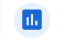

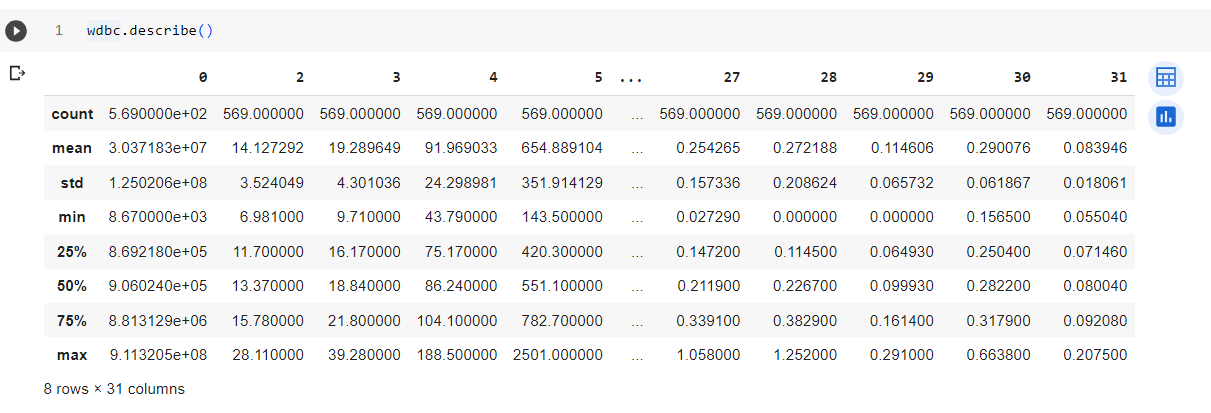

You can also analyze the data by clicking on the filtering table icon:



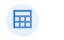

In [20]:
wdbc # descriptive charts, analysis, filter, sorter

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In column nº 1 you can see that the values are B or M, where

> **B** meaning **Benign**

> **M** meaning **Malignnat**

Let's transform the DataFrame to work with it as an array or matrix, although we can work with it as a DataFrame, but for ML it is easier working with arrays.



```
PatientCode=wdbc[0]         # 1st column is the id
Y_test=wdbc[1]              # 2nd column is the lable
data=wdbc.to_numpy()[:,2:]  # All other columns are information from patients
```



In [21]:
PatientCode = wdbc[0]         # 1st column is the id
Y_test = wdbc[1]              # 2nd column is the lable
data = wdbc.to_numpy()[:,2:]  # All other columns are information from patients



```
indata = data;                      # Final structure of the data
Ids = PatientCode.values            # Record of the ids
target_text = Y_test.values         # Record (strings) of target
target=np.ones(target_text.shape);  # Define a new numerical array with ones of the same size as the target
target[target_text=='M']=0          # Replace all Malignant with 0 as a label.
```



In [22]:
indata = data;                       # Final structure of the data
Ids = PatientCode.values             # Record of the ids
target_text = Y_test.values          # Record (strings) of target
target = np.ones(target_text.shape)  # Define a new numerical array with ones of the same size as the target
target[target_text == 'M'] = 0       # Replace all M alignant with 0 as a label.

Now we **split into train and test** 50% of the samples. We also set the random state for reprodutibility.



```
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        indata, target, test_size=0.5, random_state=42)
```



In [23]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(indata,
                                                                            target,
                                                                            test_size = 0.5, # split into train and test 50% of the samples
                                                                            random_state = 42) # reprodutibility

Now we can create the network. We do not know how many hidden layer neurons are needed nor how many layers we are needed.



```
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=10,random_state= 42)
```



In [24]:
net = MLPClassifier(solver = 'lbfgs', # ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
                    activation ='tanh', # ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
                    hidden_layer_sizes = 10,
                    random_state = 42)

What we do know you need 30 input neurons and one output. This information isn’t necessary to be supplied to the net, as it could be inferred by the data. So will only define:
*	The activation function: tanh
*	The solver method: lbfgs
*	Number of neurons of the hidden layer: 10
*	The random state: 42 (just for initializing and productivity)


Now we train the network



```
# Training the net
net.fit(X_train,y_train);
```



In [25]:
# Training the net
net.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=10, random_state=42,
              solver='lbfgs')

To see the **accuracy**, we can use the functions provided by sklearn, but we will first **create our own function for the reader convenience**. To do so please include this code in your lab, read carefully and execute before proceeding.



```
def Accuracy(net,data,target):
    import numpy as np
    output = net.predict(data)
    zeros = np.argwhere(target==0)
    ones = np.argwhere(target==1)
    val1 = np.sum(output[zeros]<0.5)
    val2 = np.sum(output[ones]>=0.5)
    acc = 1.*(val1+val2)/len(output)
    return acc
```



In [26]:
def Accuracy(net,data,target):
    import numpy as np
    output = net.predict(data)
    zeros = np.argwhere(target==0)
    ones = np.argwhere(target==1)
    val1 = np.sum(output[zeros]<0.5)
    val2 = np.sum(output[ones]>=0.5)
    acc = 1.*(val1+val2)/len(output)
    return acc

And now we can test the network by



```
non_normalized_acc = Accuracy(net,X_test,y_test)
```



In [27]:
non_normalized_acc = Accuracy(net, X_test, y_test) # testing the net

and we can also show the performance



```
print('Accuracy: ' +str(non_normalized_acc))
```



In [28]:
print('Accuracy: ' + str(non_normalized_acc))

Accuracy: 0.656140350877193


The output should be something like 65% which is not really a good deal. Student should be aware that it is possible to do it much better.
```
Accuracy: 0.656140350877193
```

The network could easily work as we did with this code, but computational performance and accuracy we can **scale the input values**, (mean 0 and variance 1), as showed in the following code:



```
# Normalization
# Apply Scaling to X_train and X_test based on X_train

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


net.fit(X_train_std,y_train)

normalized_acc = Accuracy(net,X_test_std,y_test)

print('Accuracy: ' +str(normalized_acc))
```



In [29]:
# Normalization
# Apply Scaling to X_train and X_test based on X_train

std_scale = preprocessing.StandardScaler().fit(X_train) # mean is 0 and variance is 1

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

net.fit(X_train_std, y_train)

normalized_acc = Accuracy(net, X_test_std, y_test)

print('Accuracy: ' + str(normalized_acc))

Accuracy: 0.9649122807017544


Student could be aware that the results now are significantly higher,
```
Accuracy: 0.9649122807017544
```

In [30]:
print("Prediction of the network: " + str(net.predict(X_test_std)))
print("Real output: " + str(y_test))
#print(net.predict_proba(X_test_std)) # first column is the probability of 0 and the second column is the probability of 1

Prediction of the network: [1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]
Real output: [1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 

## 4.2.	Calculating SEN, SPE, PPV, NPV

Student is requested to find on the internet some very common parameters as they are very frequently used in the literature. The parameters are: Sensibility (SEN), Specificity (SPE), Positive Predictive Value, and Negative Predictive Value. For defintion of this paramameters go to: https://en.wikipedia.org/wiki/Confusion_matrix. From that site we extracted:

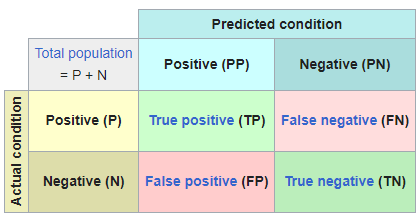

- **condition positive (P):** the number of real positive cases in the data

- **condition negative (N)**: the number of real negative cases in the data

- **true positive (TP)**: A test result that correctly indicates the presence of a condition or characteristic

- **true negative (TN)**: A test result that correctly indicates the absence of a condition or characteristic

- **false positive (FP)**: A test result which wrongly indicates that a particular condition or attribute is present

- **false negative (FN)**: A test result which wrongly indicates that a particular condition or attribute is absent

Here follows some parameters you might need in the future.

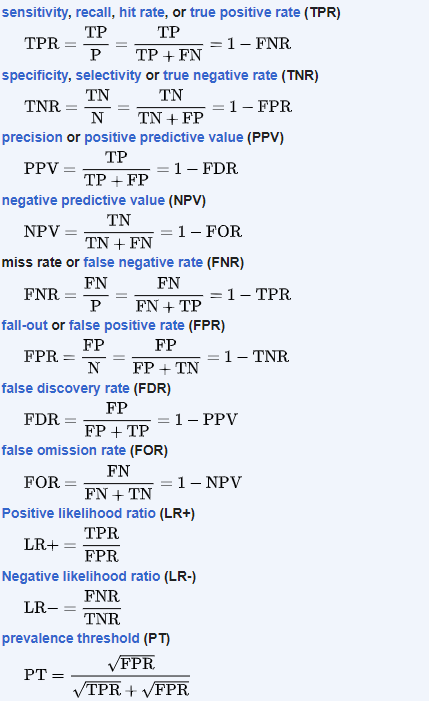

### <font color=blue size=+1> Q3: In Machine Leaning applications it is commonly used apart from the accuracy other parameters called sensitivity (sen), specificity (spe), positive predictive value (ppv) and negative predictive value (NPV). The student is required to find-out the meaning of these 4 parameters and to build a function to provide all these parameters:

```
[sen,spe,ppv,npv,acc]=med_stad(net,input,target).
```

In [31]:
def med_stad(net, input, target):

    TP = np.sum(net.predict(input)[np.argwhere(target == 1)] >= 0.5) # correctly indicates presence
    TN = np.sum(net.predict(input)[np.argwhere(target == 0)] < 0.5) # correctly indicates absebce
    FP = np.sum(net.predict(input)[np.argwhere(target == 0)] >= 0.5) # wrongly indicates presence
    FN = np.sum(net.predict(input)[np.argwhere(target == 1)] < 0.5) # wrongly indicates absence

    P = TP + FN # presence
    N = TN + FP # absence

    sen = 1.*TP/P # true positive rate
    spe = 1.*TN/N # true negative rate
    ppv = 1.*TP/(TP+FP) # positive predictive value
    npv = 1.*TN/(TN+FN) # negative predictive value
    acc = 1.*(TN+TP)/(TN+TP+FN+FP)

    return sen, spe, ppv, npv, acc

### <font color=blue size=+1> Q4: Using these functions calculate all these parameters for training set and test set.

In [32]:
sen,spe,ppv,npv,acc=med_stad(net, X_test_std, y_test)
print('sen=' + str(sen))
print('spe=' + str(spe))
print('ppv=' + str(ppv))
print('npv=' + str(npv))
print('acc=' + str(acc))

sen=0.9572192513368984
spe=0.9795918367346939
ppv=0.988950276243094
npv=0.9230769230769231
acc=0.9649122807017544


If went well, we should have the following results
```
sen=0.9572192513368984
spe=0.9795918367346939
ppv=0.988950276243094
npv=0.9230769230769231
acc=0.9649122807017544
```

Now can check the classification report as it comes out from the Sklearn, by using the command

 `classification_report(real_output,prediction_output)`

So, we will run the following command to see our results.

You should be aware that
 - recall in 0    = Negative Predictive Value (NPV)
 - recall in 1    = Positive Predictive Value (PPV)
 - precision in 0 = Specificity (SPE)
 - precision in 1 = Sensitivity (SEN)





```
print(classification_report(y_test,net.predict(X_test_std)))
```



In [33]:
print(classification_report(y_test, net.predict(X_test_std)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        98
         1.0       0.99      0.96      0.97       187

    accuracy                           0.96       285
   macro avg       0.96      0.97      0.96       285
weighted avg       0.97      0.96      0.97       285



## 4.3.	Full learning approach



### <font color=blue> Q5: The student is required to modify all parameters in this process to improve the accuracy over the test set. You may try different numbers of neurons in hidden layer, different sizes of samples in training and test. What is the best accuracy obtained?

In [34]:
# initial values
test_size_values = np.arange(0.1, 1.0, 0.1).tolist()
hidden_layer_sizes_values = [(i,) for i in range(1, 101)]
best_accuracy = 0
best_params = {}

for test_size in test_size_values:
    for hidden_layer_sizes in hidden_layer_sizes_values:
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(indata,
                                                                                    target,
                                                                                    test_size = test_size, # sizes of samples in training and testing
                                                                                    random_state = 42)
        std_scale = preprocessing.StandardScaler().fit(X_train)
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        net = MLPClassifier(solver = 'lbfgs',
                            activation ='tanh',
                            hidden_layer_sizes = hidden_layer_sizes, # numbers of neurons in hidden layer
                            random_state = 42)
        net.fit(X_train_std, y_train)

        def acc(net, input, target):
            TP = np.sum(net.predict(input)[np.argwhere(target == 1)] >= 0.5) # correctly indicates presence
            TN = np.sum(net.predict(input)[np.argwhere(target == 0)] < 0.5) # correctly indicates absebce
            FP = np.sum(net.predict(input)[np.argwhere(target == 0)] >= 0.5) # wrongly indicates presence
            FN = np.sum(net.predict(input)[np.argwhere(target == 1)] < 0.5) # wrongly indicates absence
            acc = 1.*(TN+TP)/(TN+TP+FN+FP)
            return acc

        accuracy = acc(net, X_test_std, y_test)

        # check if this is the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'test_size': test_size, 'hidden_layer_sizes': hidden_layer_sizes}

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")

Best accuracy: 0.9859649122807017
Best parameters: {'test_size': 0.5, 'hidden_layer_sizes': (1,)}
